In [ ]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os

In [ ]:
#Carga desde un archivo .csv sin indice
df = pd.read_csv('valencia_IQR_actualizado.csv')

#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9009 entries, 0 to 9008
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   neighbourhood                                 9009 non-null   object 
 1   neighbourhood_cleansed                        9009 non-null   object 
 2   neighbourhood_group_cleansed                  9009 non-null   object 
 3   property_type                                 9009 non-null   object 
 4   room_type                                     9009 non-null   object 
 5   bathrooms_text                                9009 non-null   object 
 6   amenities                                     9009 non-null   object 
 7   has_availability                              9009 non-null   object 
 8   calendar_last_scraped                         9009 non-null   object 
 9   first_review                                  9009 non-null   o

In [ ]:
df.head(10)

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,"Valencia, Spain",MORVEDRE,LA SAIDIA,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Dishes and silverware"", ""Hot wate...",t,20/06/2025,12/10/2010,...,4.67,4.63,4.85,4.80,4.51,4.51,4.0,4.0,0.0,0.0
1,Desconocido,EL SALER,POBLATS DEL SUD,Entire rental unit,Entire home/apt,1.5 baths,"[""Kitchen"", ""TV"", ""Wifi"", ""Indoor fireplace"", ...",t,20/06/2025,02/07/2013,...,5.00,5.00,5.00,5.00,4.00,4.00,5.0,5.0,0.0,0.0
2,"Valencia, Valencian Community, Spain",CABANYAL-CANYAMELAR,POBLATS MARITIMS,Entire home,Entire home/apt,4 baths,"[""Bathtub"", ""Ceiling fan"", ""Bidet"", ""Kitchen"",...",t,20/06/2025,23/07/2011,...,4.71,4.57,4.85,4.89,4.62,4.62,1.0,1.0,0.0,0.0
3,"Valencia, Valencian Community, Spain",LA ROQUETA,EXTRAMURS,Entire rental unit,Entire home/apt,1 bath,"[""Cleaning products"", ""Kitchen"", ""Single level...",t,20/06/2025,23/07/2011,...,4.91,4.88,4.89,4.88,4.84,4.85,7.0,7.0,0.0,0.0
4,Desconocido,AIORA,CAMINS AL GRAU,Entire rental unit,Entire home/apt,1 bath,"[""Cleaning products"", ""Ceiling fan"", ""Kitchen""...",t,20/06/2025,04/08/2015,...,4.44,4.44,4.67,4.67,4.33,4.44,1.0,1.0,0.0,0.0
5,"Valencia, Valencian Community, Spain",EL CARME,CIUTAT VELLA,Entire rental unit,Entire home/apt,2 baths,"[""Bathtub"", ""Exterior security cameras on prop...",t,20/06/2025,14/01/2013,...,4.90,4.82,4.98,4.98,4.91,4.77,4.0,4.0,0.0,0.0
6,Desconocido,CABANYAL-CANYAMELAR,POBLATS MARITIMS,Private room in rental unit,Private room,1 shared bath,"[""Cleaning products"", ""Kitchen"", ""Bidet"", ""Win...",t,20/06/2025,24/10/2011,...,4.90,4.92,4.90,4.95,4.78,4.79,3.0,1.0,2.0,0.0
7,Desconocido,CABANYAL-CANYAMELAR,POBLATS MARITIMS,Private room in rental unit,Private room,1 shared bath,"[""Cleaning products"", ""Kitchen"", ""Bidet"", ""Win...",t,20/06/2025,07/12/2011,...,4.87,4.93,4.90,4.95,4.77,4.80,3.0,1.0,2.0,0.0
8,"Valencia, Spain",CABANYAL-CANYAMELAR,POBLATS MARITIMS,Entire rental unit,Entire home/apt,2 baths,"[""Cleaning products"", ""Garden view"", ""Kitchen""...",t,20/06/2025,21/03/2012,...,4.50,4.46,4.76,4.79,4.79,4.35,2.0,2.0,0.0,0.0
9,"Valencia, Spain",EXPOSICIO,EL PLA DEL REAL,Private room in rental unit,Private room,1 private bath,"[""Cleaning products"", ""Ceiling fan"", ""Kitchen""...",t,20/06/2025,29/04/2013,...,4.83,4.62,4.87,4.87,4.85,4.68,3.0,0.0,0.3,0.0


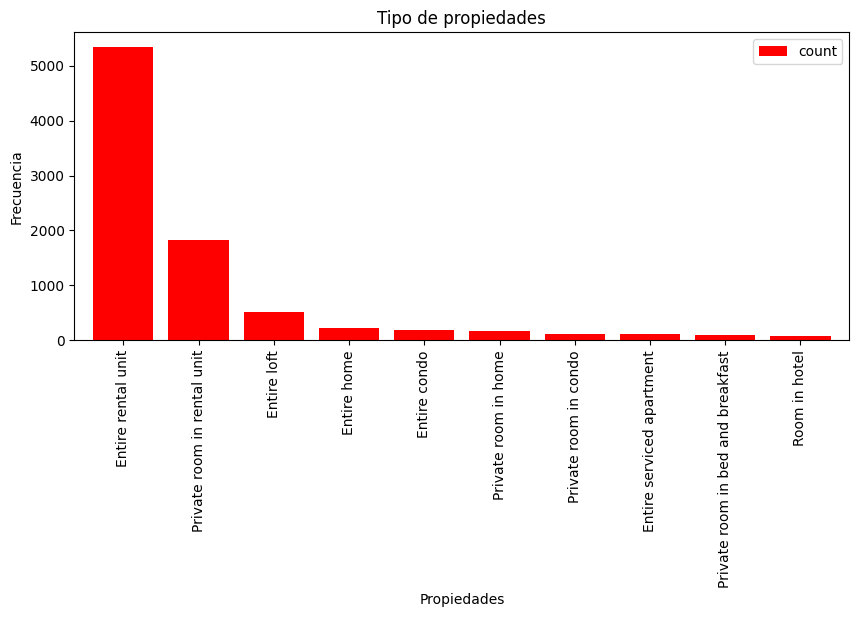

,count
count,46.000000
mean,195.847826
std,824.074025
min,1.000000
25%,2.000000
50%,5.500000
75%,37.500000
max,5343.000000


In [ ]:
# Análisis univariado property_type-1
Tabla_freq_prop = df['property_type'].value_counts().reset_index()
Tabla_freq_prop.columns = ['property_type', 'count']
Tabla_freq_prop

# Filtro de valores más relevantes de la variable categórica
Filtro_prop = Tabla_freq_prop[Tabla_freq_prop['count'] > 65]
Filtro_prop

# Ajustar el índice del DF
Filtro_index_prop = Filtro_prop.set_index('property_type')
Filtro_index_prop

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_prop.plot(kind='bar', width=0.8, figsize=(10,4), color="red")
plt.title('Tipo de propiedades')
plt.xlabel('Propiedades')
plt.ylabel('Frecuencia')
plt.show()
Tabla_freq_prop.describe()

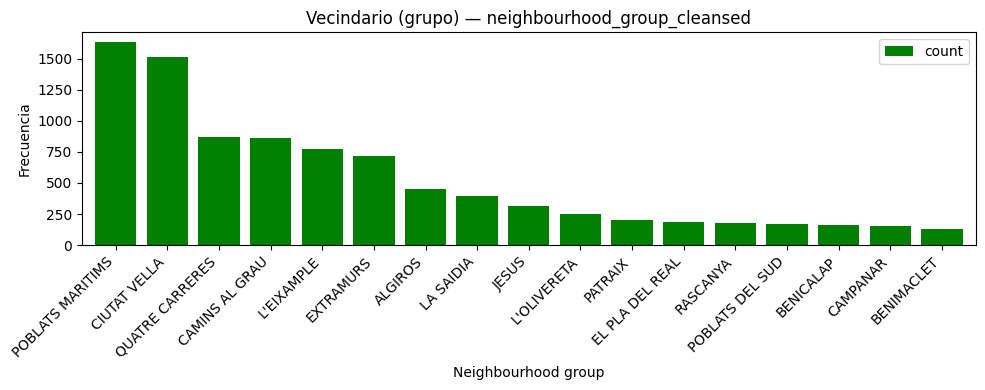

,count
count,19.000000
mean,474.157895
std,470.955679
min,9.000000
25%,164.000000
50%,249.000000
75%,743.500000
max,1630.000000


In [ ]:
# Análisis univariado neighbourhood_group_cleansed-2
Tabla_freq_cleansed = df['neighbourhood_group_cleansed'].value_counts().reset_index()
Tabla_freq_cleansed.columns = ['neighbourhood_group_cleansed', 'count']
Tabla_freq_cleansed

# Filtro de valores más relevantes de la variable categórica
Filtro_cleansed = Tabla_freq_cleansed[Tabla_freq_cleansed['count'] > 65]
Filtro_cleansed

# Ajustar el índice del DF
Filtro_index_cleansed = Filtro_cleansed.set_index('neighbourhood_group_cleansed')
Filtro_index_cleansed

# Realizar gráfica de barras del DF filtrado
Filtro_index_cleansed.plot(kind='bar', width=0.8, figsize=(10,4), color="green")
plt.title('Vecindario (grupo) — neighbourhood_group_cleansed')
plt.xlabel('Neighbourhood group')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
Tabla_freq_cleansed.describe()

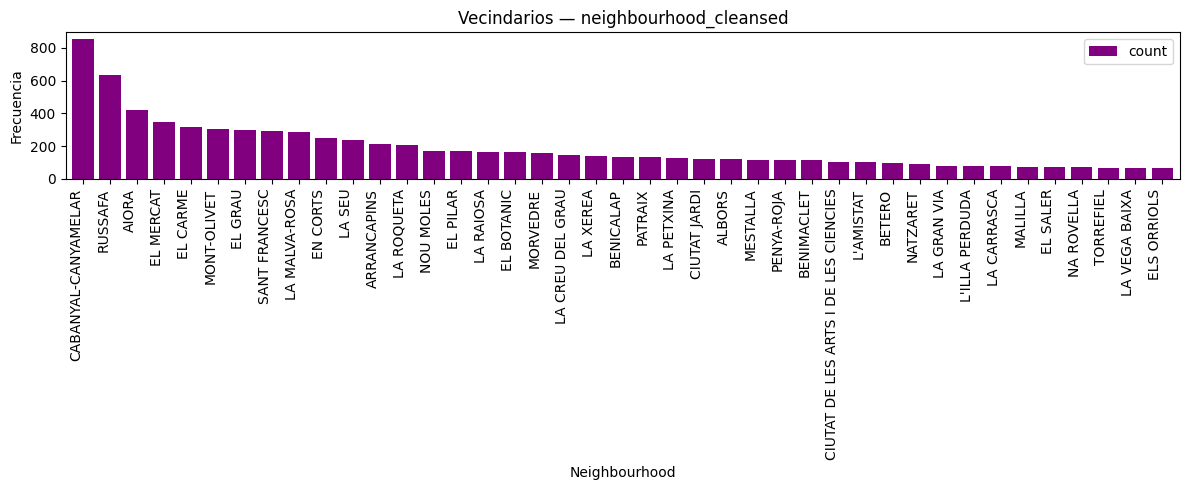

In [ ]:
# Análisis univariado neighbourhood_cleansed-3
Tabla_freq_neigh = df['neighbourhood_cleansed'].value_counts().reset_index()
Tabla_freq_neigh.columns = ['neighbourhood_cleansed', 'count']
Tabla_freq_neigh

# Filtro de valores más relevantes de la variable categórica
Filtro_neigh = Tabla_freq_neigh[Tabla_freq_neigh['count'] > 65]
Filtro_neigh

# Ajustar el índice del DF
Filtro_index_neigh = Filtro_neigh.set_index('neighbourhood_cleansed')
Filtro_index_neigh

# Realizar gráfica de barras del DF filtrado
Filtro_index_neigh.plot(kind='bar', width=0.8, figsize=(12,5), color="purple")
plt.title('Vecindarios — neighbourhood_cleansed')
plt.xlabel('Neighbourhood')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


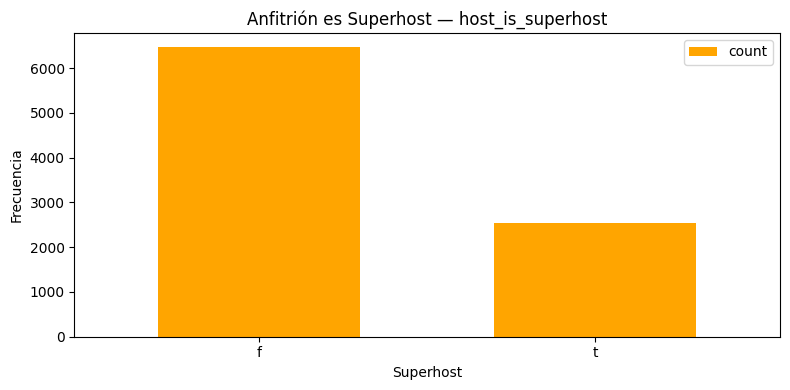

In [ ]:
# Análisis univariado host_is_superhost-4
Tabla_freq_superhost = df['host_is_superhost'].value_counts().reset_index()
Tabla_freq_superhost.columns = ['host_is_superhost', 'count']
Tabla_freq_superhost

# Filtro de valores más relevantes de la variable categórica
Filtro_superhost = Tabla_freq_superhost[Tabla_freq_superhost['count'] > 65]
Filtro_superhost

# Ajustar el índice del DF
Filtro_index_superhost = Filtro_superhost.set_index('host_is_superhost')
Filtro_index_superhost

# Realizar gráfica de barras del DF filtrado
Filtro_index_superhost.plot(kind='bar', width=0.6, figsize=(8,4), color="orange")
plt.title('Anfitrión es Superhost — host_is_superhost')
plt.xlabel('Superhost')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


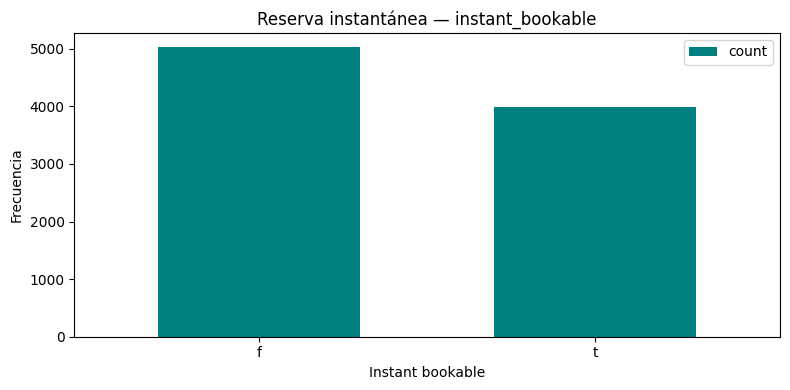

In [ ]:
# Análisis univariado instant_bookable-5
Tabla_freq_instant = df['instant_bookable'].value_counts().reset_index()
Tabla_freq_instant.columns = ['instant_bookable', 'count']
Tabla_freq_instant

# Filtro de valores más relevantes de la variable categórica
Filtro_instant = Tabla_freq_instant[Tabla_freq_instant['count'] > 65]
Filtro_instant

# Ajustar el índice del DF
Filtro_index_instant = Filtro_instant.set_index('instant_bookable')
Filtro_index_instant

# Realizar gráfica de barras del DF filtrado
Filtro_index_instant.plot(kind='bar', width=0.6, figsize=(8,4), color="teal")
plt.title('Reserva instantánea — instant_bookable')
plt.xlabel('Instant bookable')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


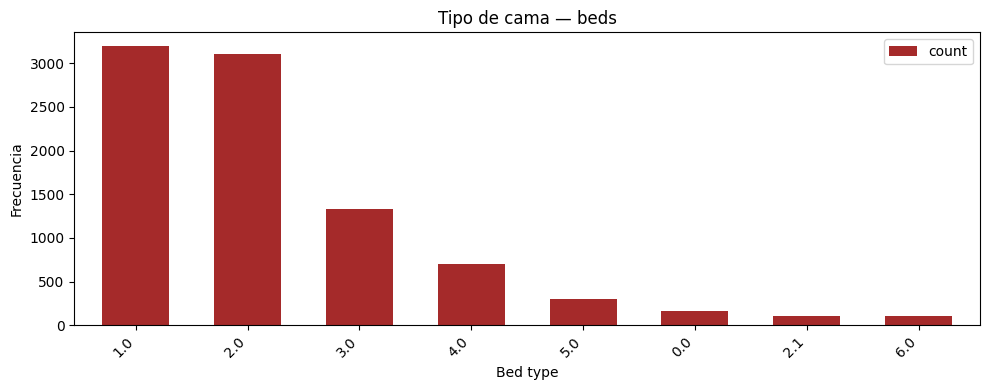

In [ ]:
# Análisis univariado bed_type-6
Tabla_freq_bed = df['beds'].value_counts().reset_index()
Tabla_freq_bed.columns = ['beds', 'count']
Tabla_freq_bed

# Filtro de valores más relevantes de la variable categórica
Filtro_bed = Tabla_freq_bed[Tabla_freq_bed['count'] > 65]
Filtro_bed

# Ajustar el índice del DF
Filtro_index_bed = Filtro_bed.set_index('beds')
Filtro_index_bed

# Realizar gráfica de barras del DF filtrado
Filtro_index_bed.plot(kind='bar', width=0.6, figsize=(10,4), color="brown")
plt.title('Tipo de cama — beds')
plt.xlabel('Bed type')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


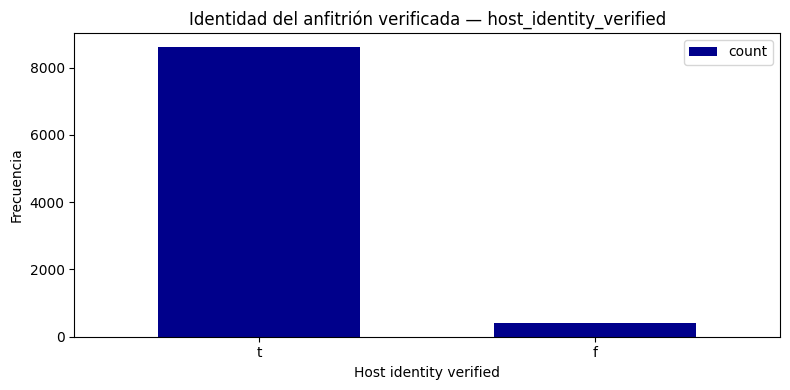

In [ ]:
# Análisis univariado host_identity_verified-7
Tabla_freq_verified = df['host_identity_verified'].value_counts().reset_index()
Tabla_freq_verified.columns = ['host_identity_verified', 'count']
Tabla_freq_verified

# Filtro de valores más relevantes de la variable categórica
Filtro_verified = Tabla_freq_verified[Tabla_freq_verified['count'] > 65]
Filtro_verified

# Ajustar el índice del DF
Filtro_index_verified = Filtro_verified.set_index('host_identity_verified')
Filtro_index_verified

# Realizar gráfica de barras del DF filtrado
Filtro_index_verified.plot(kind='bar', width=0.6, figsize=(8,4), color="darkblue")
plt.title('Identidad del anfitrión verificada — host_identity_verified')
plt.xlabel('Host identity verified')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


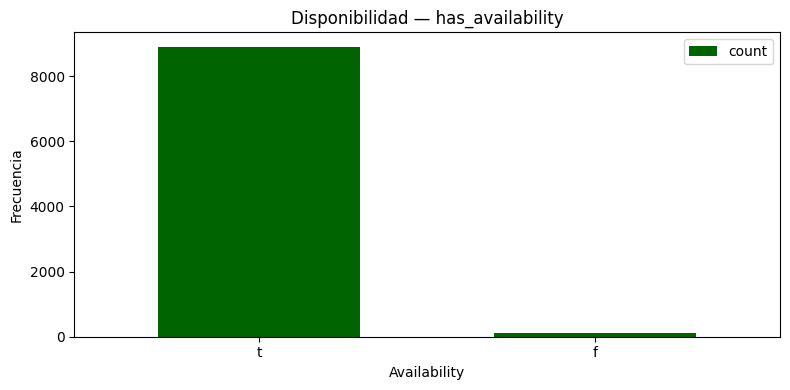

In [ ]:
# Análisis univariado has_availability-8
Tabla_freq_avail = df['has_availability'].value_counts().reset_index()
Tabla_freq_avail.columns = ['has_availability', 'count']
Tabla_freq_avail

# Filtro de valores más relevantes de la variable categórica
Filtro_avail = Tabla_freq_avail[Tabla_freq_avail['count'] > 65]
Filtro_avail

# Ajustar el índice del DF
Filtro_index_avail = Filtro_avail.set_index('has_availability')
Filtro_index_avail

# Realizar gráfica de barras del DF filtrado
Filtro_index_avail.plot(kind='bar', width=0.6, figsize=(8,4), color="darkgreen")
plt.title('Disponibilidad — has_availability')
plt.xlabel('Availability')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


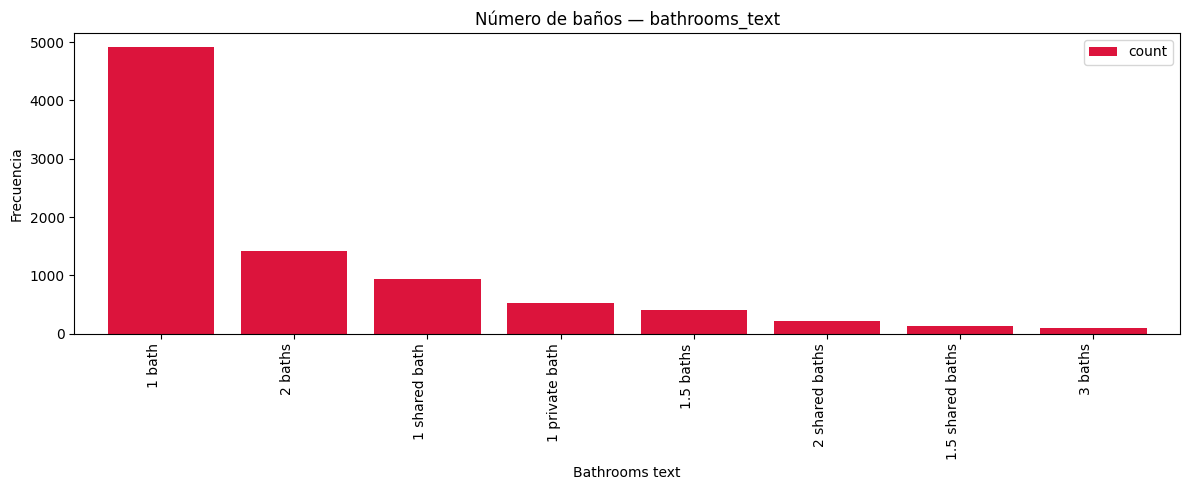

In [ ]:
# Análisis univariado bathrooms_text
Tabla_freq_bath = df['bathrooms_text'].value_counts().reset_index()
Tabla_freq_bath.columns = ['bathrooms_text', 'count']
Tabla_freq_bath

# Filtro de valores más relevantes de la variable categórica
Filtro_bath = Tabla_freq_bath[Tabla_freq_bath['count'] > 65]
Filtro_bath

# Ajustar el índice del DF
Filtro_index_bath = Filtro_bath.set_index('bathrooms_text')
Filtro_index_bath

# Realizar gráfica de barras del DF filtrado
Filtro_index_bath.plot(kind='bar', width=0.8, figsize=(12,5), color="crimson")
plt.title('Número de baños — bathrooms_text')
plt.xlabel('Bathrooms text')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


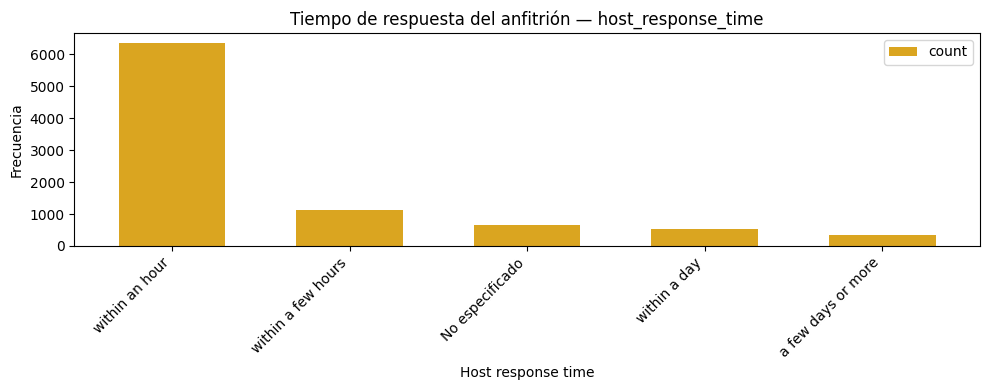

In [ ]:
# Análisis univariado host_response_time
Tabla_freq_resp_time = df['host_response_time'].value_counts().reset_index()
Tabla_freq_resp_time.columns = ['host_response_time', 'count']
Tabla_freq_resp_time

# Filtro de valores más relevantes de la variable categórica
Filtro_resp_time = Tabla_freq_resp_time[Tabla_freq_resp_time['count'] > 65]
Filtro_resp_time

# Ajustar el índice del DF
Filtro_index_resp_time = Filtro_resp_time.set_index('host_response_time')
Filtro_index_resp_time

# Realizar gráfica de barras del DF filtrado
Filtro_index_resp_time.plot(kind='bar', width=0.6, figsize=(10,4), color="goldenrod")
plt.title('Tiempo de respuesta del anfitrión — host_response_time')
plt.xlabel('Host response time')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Categorización**

Total n: 8354
Mínimo: 0.0
Máximo: 100.0
Rango: 100.0
Número de intervalos (Sturges): 14
Ancho del intervalo: 7.142857142857143
host_response_rate_cat
(-0.001, 7.143]      167
(7.143, 14.286]       58
(14.286, 21.429]      22
(21.429, 28.571]      10
(28.571, 35.714]      36
(35.714, 42.857]      28
(42.857, 50.0]        72
(50.0, 57.143]        11
(57.143, 64.286]      57
(64.286, 71.429]      78
(71.429, 78.571]      46
(78.571, 85.714]     444
(85.714, 92.857]     514
(92.857, 100.0]     6811
Name: count, dtype: int64


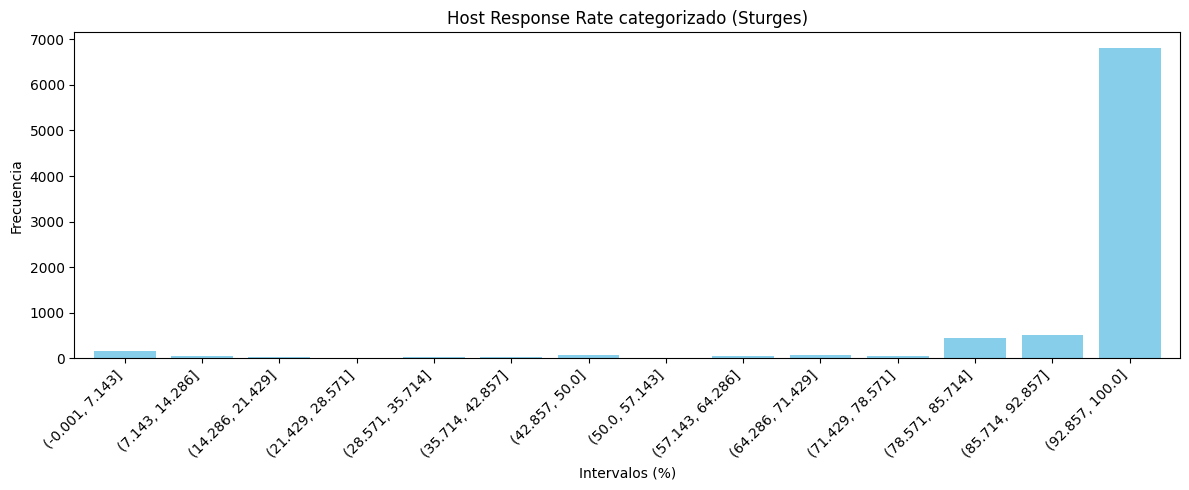

In [ ]:
# Limpiamos y convertimos la columna
df['host_response_rate_num'] = (
    df['host_response_rate']
    .astype(str)
    .str.replace('%','')
    .replace(['nan', 'NaN', 'None', 'Sin dato'], np.nan)  # manejamos textos no numéricos
    .astype(float)
)

# Número total de observaciones
n = df['host_response_rate_num'].dropna().shape[0]

# Calcular valores máximo y mínimo
Max_resp = df['host_response_rate_num'].max()
Min_resp = df['host_response_rate_num'].min()

# Rango
R_resp = Max_resp - Min_resp

# Número de intervalos (Sturges)
ni_resp = int(1 + 3.32*np.log10(n))

# Ancho de clase
i_resp = R_resp / ni_resp

print("Total n:", n)
print("Mínimo:", Min_resp)
print("Máximo:", Max_resp)
print("Rango:", R_resp)
print("Número de intervalos (Sturges):", ni_resp)
print("Ancho del intervalo:", i_resp)

# Crear intervalos automáticamente
intervalos_resp = np.linspace(Min_resp, Max_resp, ni_resp+1)

# Crear categorías
df['host_response_rate_cat'] = pd.cut(
    x=df['host_response_rate_num'],
    bins=intervalos_resp,
    include_lowest=True
)

# Tabla de frecuencias
tabla_resp_cat = df['host_response_rate_cat'].value_counts().sort_index()
print(tabla_resp_cat)

# Gráfico de frecuencias
tabla_resp_cat.plot(kind='bar', figsize=(12,5), color="skyblue", width=0.8)
plt.title('Host Response Rate categorizado (Sturges)')
plt.xlabel('Intervalos (%)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Total n: 8602
Mínimo: 0.0
Máximo: 100.0
Rango: 100.0
Número de intervalos (Sturges): 14
Ancho del intervalo: 7.142857142857143
host_acceptance_rate_cat
(-0.001, 7.143]      316
(7.143, 14.286]       26
(14.286, 21.429]     116
(21.429, 28.571]      46
(28.571, 35.714]      48
(35.714, 42.857]     108
(42.857, 50.0]       200
(50.0, 57.143]       125
(57.143, 64.286]     188
(64.286, 71.429]     227
(71.429, 78.571]     269
(78.571, 85.714]     328
(85.714, 92.857]     584
(92.857, 100.0]     6021
Name: count, dtype: int64


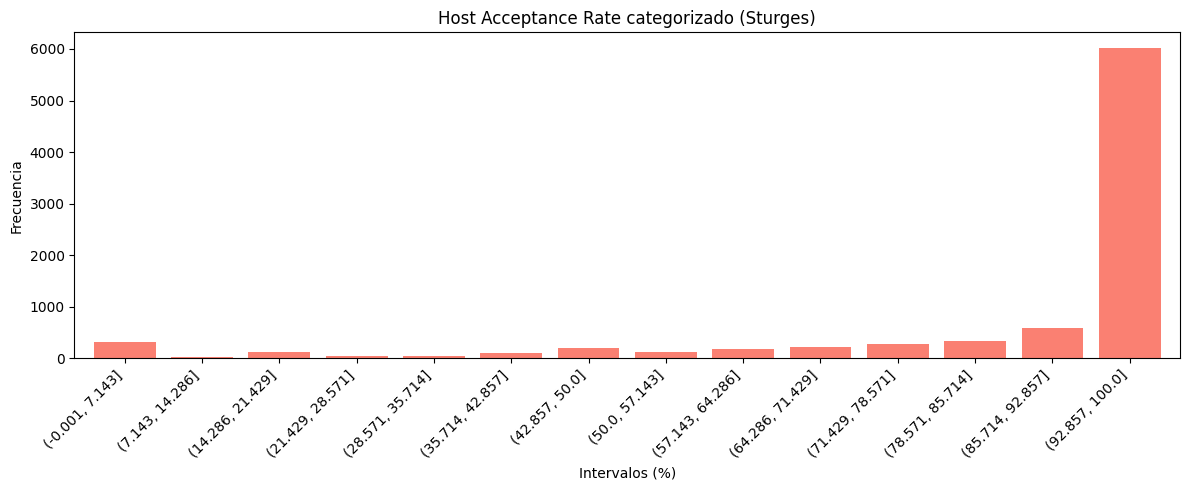

In [ ]:
# 1) Limpiar y convertir a numérico (quita % y maneja textos no numéricos)
df['host_acceptance_rate_num'] = (
    df['host_acceptance_rate']
    .astype(str)
    .str.replace('%', '', regex=False)
    .replace(['nan', 'NaN', 'None', 'Sin dato', 'sin dato', 'SIN DATO', ''], np.nan)
    .astype(float)
)

# 2) Parámetros básicos
n = df['host_acceptance_rate_num'].dropna().shape[0]
Min_acc = df['host_acceptance_rate_num'].min()
Max_acc = df['host_acceptance_rate_num'].max()
R_acc = Max_acc - Min_acc
ni_acc = int(1 + 3.32 * np.log10(n)) if n > 0 else 1  # Sturges
i_acc = R_acc / ni_acc if ni_acc > 0 else np.nan

print("Total n:", n)
print("Mínimo:", Min_acc)
print("Máximo:", Max_acc)
print("Rango:", R_acc)
print("Número de intervalos (Sturges):", ni_acc)
print("Ancho del intervalo:", i_acc)

# 3) Crear intervalos y categorizar
if n > 0 and R_acc >= 0:
    intervalos_acc = np.linspace(Min_acc, Max_acc, ni_acc + 1)
    df['host_acceptance_rate_cat'] = pd.cut(
        x=df['host_acceptance_rate_num'],
        bins=intervalos_acc,
        include_lowest=True
    )

    # 4) Tabla de frecuencias por categoría
    tabla_acc_cat = df['host_acceptance_rate_cat'].value_counts().sort_index()
    print(tabla_acc_cat)

    # 5) Gráfico de barras
    tabla_acc_cat.plot(kind='bar', figsize=(12, 5), color="salmon", width=0.8)
    plt.title('Host Acceptance Rate categorizado (Sturges)')
    plt.xlabel('Intervalos (%)')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos suficientes para categorizar host_acceptance_rate.")


Total n: 9009
Mínimo: 1.0
Máximo: 26.0
Rango: 25.0
Número de intervalos (Sturges): 14
Ancho del intervalo: 1.7857142857142858
calculated_host_listings_count_cat
(0.999, 2.786]      3947
(2.786, 4.571]      1341
(4.571, 6.357]      1904
(6.357, 8.143]       503
(8.143, 9.929]       189
(9.929, 11.714]      266
(11.714, 13.5]       202
(13.5, 15.286]       132
(15.286, 17.071]     129
(17.071, 18.857]     108
(18.857, 20.643]      78
(20.643, 22.429]      42
(22.429, 24.214]      92
(24.214, 26.0]        76
Name: count, dtype: int64


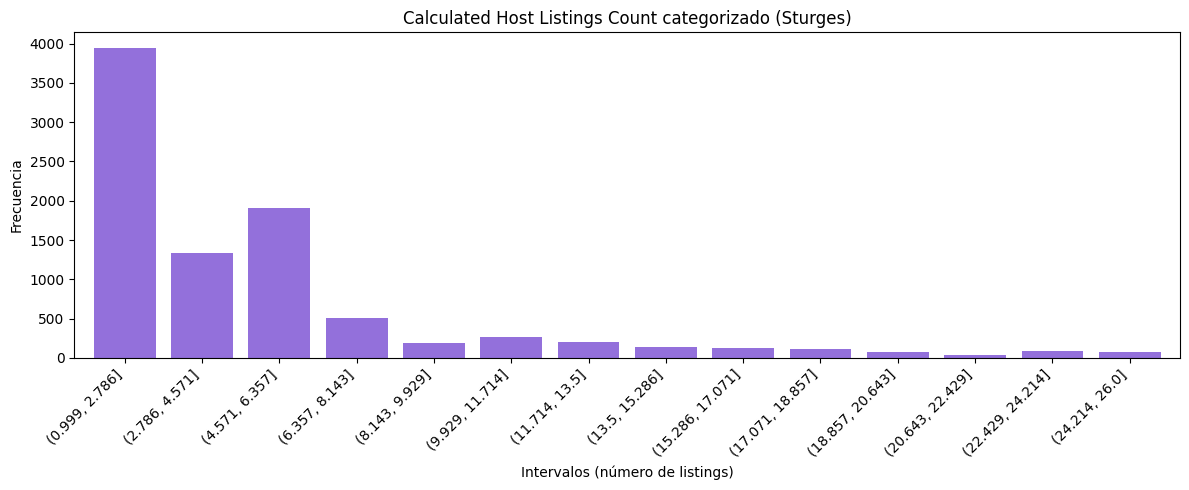

In [ ]:
# 1) Asegurar numérico
df['calculated_host_listings_count_num'] = pd.to_numeric(df['calculated_host_listings_count'], errors='coerce')
# 2) Parámetros básicos
n = df['calculated_host_listings_count_num'].dropna().shape[0]
Min_chl = df['calculated_host_listings_count_num'].min()
Max_chl = df['calculated_host_listings_count_num'].max()
R_chl = Max_chl - Min_chl
ni_chl = int(1 + 3.32 * np.log10(n)) if n > 0 else 1  # Sturges
i_chl = R_chl / ni_chl if ni_chl > 0 else np.nan
print("Total n:", n)
print("Mínimo:", Min_chl)
print("Máximo:", Max_chl)
print("Rango:", R_chl)
print("Número de intervalos (Sturges):", ni_chl)
print("Ancho del intervalo:", i_chl)
# 3) Crear intervalos y categorizar
if n > 0 and R_chl >= 0:
    # Manejo si todos los valores son iguales
    if R_chl == 0:
        intervalos_chl = np.array([Min_chl - 0.5, Max_chl + 0.5])
    else:
        intervalos_chl = np.linspace(Min_chl, Max_chl, ni_chl + 1)

    df['calculated_host_listings_count_cat'] = pd.cut(
        x=df['calculated_host_listings_count_num'],
        bins=intervalos_chl,
        include_lowest=True
    )

    # 4) Tabla de frecuencias
    tabla_chl_cat = df['calculated_host_listings_count_cat'].value_counts().sort_index()
    print(tabla_chl_cat)

    # 5) Gráfico
    tabla_chl_cat.plot(kind='bar', figsize=(12, 5), color="mediumpurple", width=0.8)
    plt.title('Calculated Host Listings Count categorizado (Sturges)')
    plt.xlabel('Intervalos (número de listings)')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos suficientes para categorizar calculated_host_listings_count.")


Total n: 8602
Mínimo: 0.0
Máximo: 100.0
Rango: 100.0
Número de intervalos (Sturges aprox.): 14.062870134884001 | Usados: 15
host_acceptance_rate_cat
Very low (-0.01 - 6.66%)          300
Limited (6.66 - 13.33%)            37
Low (13.33 - 19.99%)               90
Selective (19.99 - 26.66%)         72
Mod.-low (26.66 - 33.33%)          45
Moderate (33.33 - 40.00%)          75
Balanced (40.00 - 46.67%)          79
Acceptable (46.67 - 53.33%)       222
Satisfactory (53.33 - 60.00%)     137
High (60.00 - 66.67%)             158
Reliable (66.67 - 73.34%)         214
Very high (73.34 - 80.01%)        331
Generous (80.01 - 86.67%)         313
Excellent (86.67 - 93.34%)        697
Premium (93.34 - 100.01%)        5832
Name: count, dtype: int64


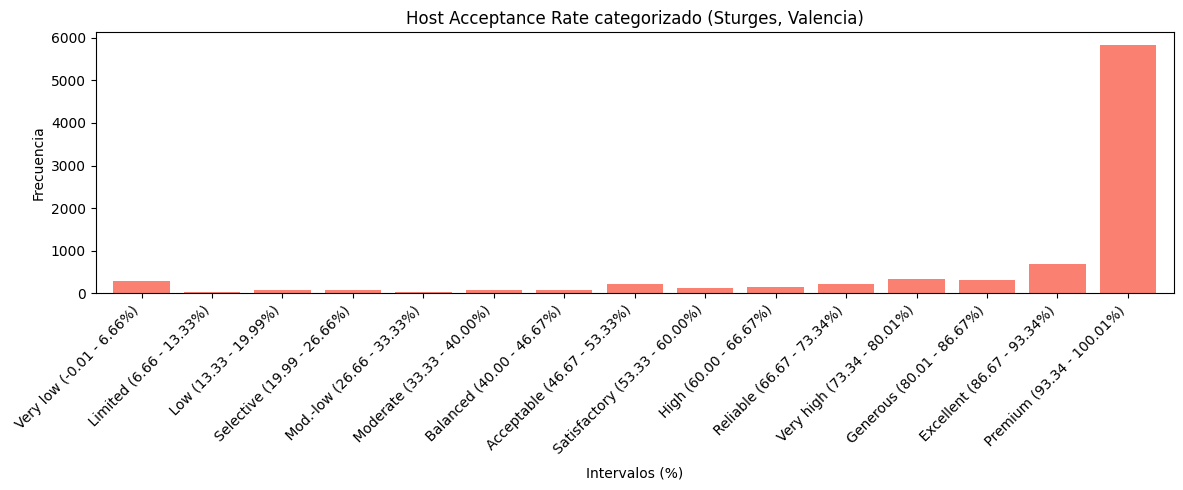

In [ ]:
# 1) Limpiar y convertir a numérico (quita % y maneja "Sin dato")
df['host_acceptance_rate_num'] = (
    df['host_acceptance_rate']
    .astype(str)
    .str.replace('%', '', regex=False)
    .replace(['nan', 'NaN', 'None', 'Sin dato', 'SIN DATO', ''], np.nan)
    .astype(float)
)

# 2) Parámetros básicos
n = df['host_acceptance_rate_num'].dropna().shape[0]
Max_accep = df['host_acceptance_rate_num'].max()   # debería ser 100
Min_accep = df['host_acceptance_rate_num'].min()   # debería ser 0
R_accep = Max_accep - Min_accep
ni_accep_real = 1 + 3.32 * np.log10(n) if n > 0 else 1
ni_accep = 15   # Forzamos 15 intervalos como en tu ejemplo

print("Total n:", n)
print("Mínimo:", Min_accep)
print("Máximo:", Max_accep)
print("Rango:", R_accep)
print("Número de intervalos (Sturges aprox.):", ni_accep_real, "| Usados:", ni_accep)

# 3) Intervalos (con pequeño ajuste de bordes)
low_edge  = Min_accep - 0.01
high_edge = Max_accep + 0.01
intervalos_accep = np.linspace(low_edge, high_edge, ni_accep + 1)

# 4) Etiquetas DE/EN fijas
nombres_de_en = [
    " Very low",
    " Limited",
    " Low",
    " Selective",
    " Mod.-low",
    " Moderate",
    " Balanced",
    " Acceptable",
    " Satisfactory",
    " High",
    " Reliable",
    " Very high",
    " Generous",
    " Excellent",
    " Premium"
]

# Armar etiquetas con los rangos reales
categorias_accep = []
for j in range(ni_accep):
    a, b = intervalos_accep[j], intervalos_accep[j+1]
    categorias_accep.append(f"{nombres_de_en[j]} ({a:.2f} - {b:.2f}%)")

# 5) Crear columna categórica
df['host_acceptance_rate_cat'] = pd.cut(
    x=df['host_acceptance_rate_num'],
    bins=intervalos_accep,
    labels=categorias_accep,
    include_lowest=True,
    right=False
)

# 6) Tabla de frecuencias
tabla_acc_cat = df['host_acceptance_rate_cat'].value_counts().sort_index()
print(tabla_acc_cat)

# 7) Gráfico
tabla_acc_cat.plot(kind='bar', figsize=(12,5), color="salmon", width=0.8)
plt.title('Host Acceptance Rate categorizado (Sturges, Valencia)')
plt.xlabel('Intervalos (%)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Total n: 8602
Min: 0.0
Max: 100.0
Range: 100.0
Sturges (approx.): 14.062870134884001 | Used: 15
host_acceptance_rate_cat
Very low (-0.01 - 6.66%)          300
Limited (6.66 - 13.33%)            37
Low (13.33 - 19.99%)               90
Selective (19.99 - 26.66%)         72
Mod.-low (26.66 - 33.33%)          45
Moderate (33.33 - 40.00%)          75
Balanced (40.00 - 46.67%)          79
Acceptable (46.67 - 53.33%)       222
Satisfactory (53.33 - 60.00%)     137
High (60.00 - 66.67%)             158
Reliable (66.67 - 73.34%)         214
Very high (73.34 - 80.01%)        331
Generous (80.01 - 86.67%)         313
Excellent (86.67 - 93.34%)        697
Premium (93.34 - 100.01%)        5832
Name: count, dtype: int64


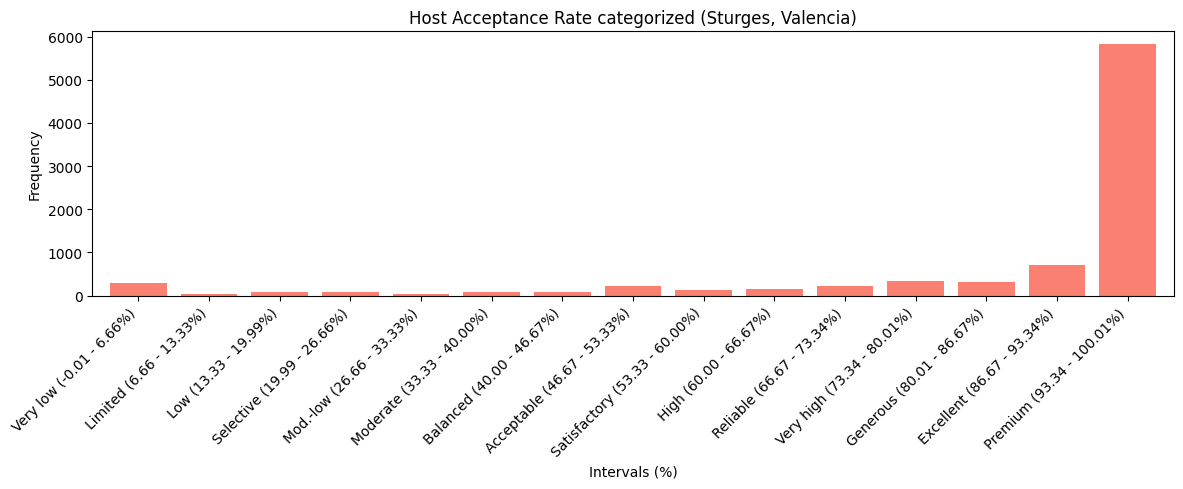

In [ ]:
# 1) Clean and convert to numeric (remove % and handle "Sin dato")
df['host_acceptance_rate_num'] = (
    df['host_acceptance_rate']
    .astype(str)
    .str.replace('%', '', regex=False)
    .replace(['nan', 'NaN', 'None', 'Sin dato', 'SIN DATO', ''], np.nan)
    .astype(float)
)

# 2) Basic parameters
n = df['host_acceptance_rate_num'].dropna().shape[0]
Max_accep = df['host_acceptance_rate_num'].max()   # likely 100
Min_accep = df['host_acceptance_rate_num'].min()   # could be 0
R_accep   = Max_accep - Min_accep
ni_accep_real = 1 + 3.32 * np.log10(n) if n > 0 else 1
ni_accep = 15  # force 15 classes as in your style

print("Total n:", n)
print("Min:", Min_accep)
print("Max:", Max_accep)
print("Range:", R_accep)
print("Sturges (approx.):", ni_accep_real, "| Used:", ni_accep)

# 3) Edges (slight padding)
low_edge  = Min_accep - 0.01
high_edge = Max_accep + 0.01
intervalos_accep = np.linspace(low_edge, high_edge, ni_accep + 1)

# 4) English-only labels
names_en = [
    "Very low",
    "Limited",
    "Low",
    "Selective",
    "Mod.-low",
    "Moderate",
    "Balanced",
    "Acceptable",
    "Satisfactory",
    "High",
    "Reliable",
    "Very high",
    "Generous",
    "Excellent",
    "Premium"
]

# Build labels with real bin bounds
categorias_accep = []
for j in range(ni_accep):
    a, b = intervalos_accep[j], intervalos_accep[j+1]
    categorias_accep.append(f"{names_en[j]} ({a:.2f} - {b:.2f}%)")

# 5) Categorize into bins
df['host_acceptance_rate_cat'] = pd.cut(
    x=df['host_acceptance_rate_num'],
    bins=intervalos_accep,
    labels=categorias_accep,
    include_lowest=True,
    right=False
)

# 6) Frequency table
tabla_acc_cat = df['host_acceptance_rate_cat'].value_counts().sort_index()
print(tabla_acc_cat)

# 7) Plot
tabla_acc_cat.plot(kind='bar', figsize=(12,5), color="salmon", width=0.8)
plt.title('Host Acceptance Rate categorized (Sturges, Valencia)')
plt.xlabel('Intervals (%)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Total n: 9009
Min: 1.0
Max: 7.0
Range: 6.0
Sturges (approx.): 14.129526268569895 | Used: 15
accommodates_cat
Very low (0.50 - 0.97)           0
Limited (0.97 - 1.43)          945
Low (1.43 - 1.90)                0
Selective (1.90 - 2.37)       2552
Mod.-low (2.37 - 2.83)           0
Moderate (2.83 - 3.30)         866
Balanced (3.30 - 3.77)         356
Acceptable (3.77 - 4.23)      2713
Satisfactory (4.23 - 4.70)       0
High (4.70 - 5.17)             571
Reliable (5.17 - 5.63)           0
Very high (5.63 - 6.10)        882
Generous (6.10 - 6.57)           0
Excellent (6.57 - 7.03)        124
Premium (7.03 - 7.50)            0
Name: count, dtype: int64


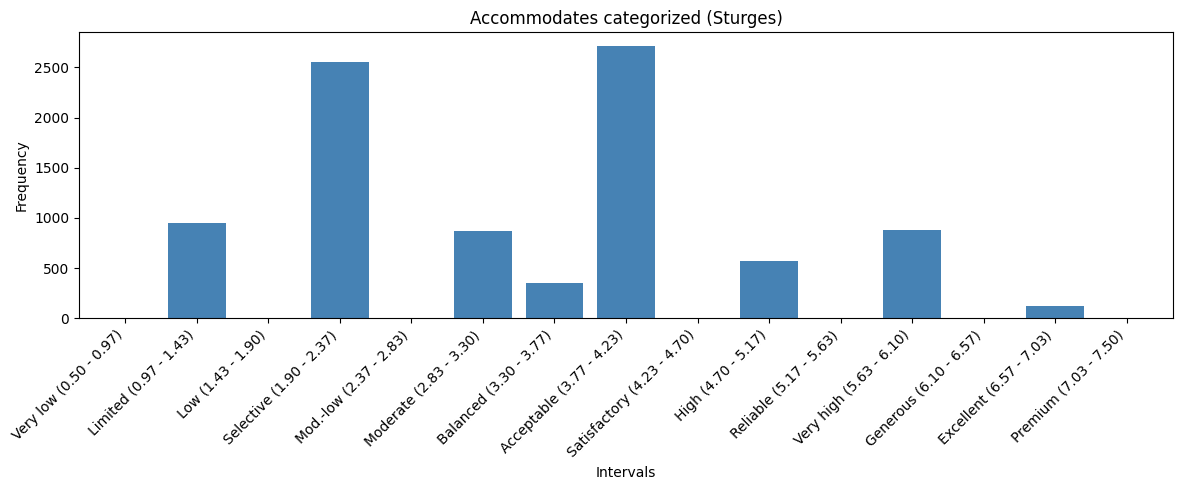

In [ ]:

# 1) Clean & numeric
df['accommodates_num'] = pd.to_numeric(df['accommodates'], errors='coerce')

# 2) Basic parameters
n = df['accommodates_num'].dropna().shape[0]
Min_accm = df['accommodates_num'].min()
Max_accm = df['accommodates_num'].max()
R_accm   = Max_accm - Min_accm
ni_accm_real = 1 + 3.32 * np.log10(n) if n > 0 else 1
ni_accm = 15  # same style: force 15 classes

print("Total n:", n)
print("Min:", Min_accm)
print("Max:", Max_accm)
print("Range:", R_accm)
print("Sturges (approx.):", ni_accm_real, "| Used:", ni_accm)

# 3) Bin edges (slight padding). For counts, use .5 to align integers in bins
low_edge  = Min_accm - 0.5
high_edge = Max_accm + 0.5
intervalos_accm = np.linspace(low_edge, high_edge, ni_accm + 1)

# 4) English-only labels
names_en = [
    "Very low","Limited","Low","Selective","Mod.-low",
    "Moderate","Balanced","Acceptable","Satisfactory","High",
    "Reliable","Very high","Generous","Excellent","Premium"
]

categorias_accm = []
for j in range(ni_accm):
    a, b = intervalos_accm[j], intervalos_accm[j+1]
    categorias_accm.append(f"{names_en[j]} ({a:.2f} - {b:.2f})")

# 5) Categorize
df['accommodates_cat'] = pd.cut(
    x=df['accommodates_num'],
    bins=intervalos_accm,
    labels=categorias_accm,
    include_lowest=True,
    right=False
)

# 6) Frequency table
tabla_accm_cat = df['accommodates_cat'].value_counts().sort_index()
print(tabla_accm_cat)

# 7) Plot
tabla_accm_cat.plot(kind='bar', figsize=(12,5), color="steelblue", width=0.8)
plt.title('Accommodates categorized (Sturges)')
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Total n: 9009
Min: 0.0
Max: 6.0
Range: 6.0
Sturges (approx.): 14.129526268569895 | Used: 15
beds_cat
Very low (-0.50 - -0.03)         0
Limited (-0.03 - 0.43)         167
Low (0.43 - 0.90)                0
Selective (0.90 - 1.37)       3194
Mod.-low (1.37 - 1.83)           0
Moderate (1.83 - 2.30)        3216
Balanced (2.30 - 2.77)           0
Acceptable (2.77 - 3.23)      1326
Satisfactory (3.23 - 3.70)       0
High (3.70 - 4.17)             700
Reliable (4.17 - 4.63)           0
Very high (4.63 - 5.10)        299
Generous (5.10 - 5.57)           0
Excellent (5.57 - 6.03)        107
Premium (6.03 - 6.50)            0
Name: count, dtype: int64


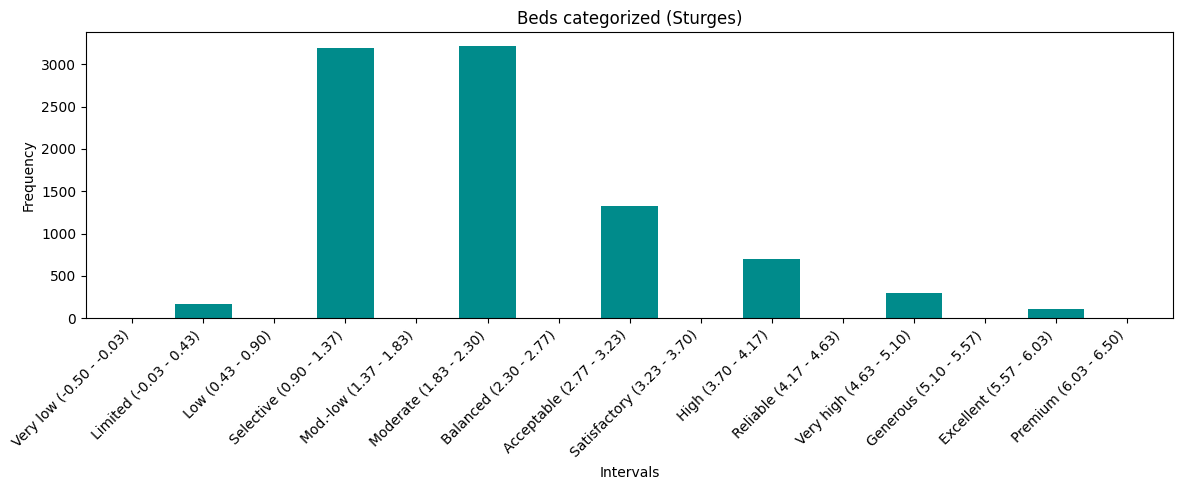

In [ ]:


# 1) Clean & numeric
df['beds_num'] = pd.to_numeric(df['beds'], errors='coerce')

# 2) Basic parameters
n = df['beds_num'].dropna().shape[0]
Min_beds = df['beds_num'].min()
Max_beds = df['beds_num'].max()
R_beds   = Max_beds - Min_beds
ni_beds_real = 1 + 3.32 * np.log10(n) if n > 0 else 1
ni_beds = 15  # same style: force 15 classes

print("Total n:", n)
print("Min:", Min_beds)
print("Max:", Max_beds)
print("Range:", R_beds)
print("Sturges (approx.):", ni_beds_real, "| Used:", ni_beds)

# 3) Bin edges (padding .5 to align integers into bins)
low_edge  = Min_beds - 0.5
high_edge = Max_beds + 0.5
intervalos_beds = np.linspace(low_edge, high_edge, ni_beds + 1)

# 4) English-only labels
names_en = [
    "Very low","Limited","Low","Selective","Mod.-low",
    "Moderate","Balanced","Acceptable","Satisfactory","High",
    "Reliable","Very high","Generous","Excellent","Premium"
]

categorias_beds = []
for j in range(ni_beds):
    a, b = intervalos_beds[j], intervalos_beds[j+1]
    categorias_beds.append(f"{names_en[j]} ({a:.2f} - {b:.2f})")

# 5) Categorize
df['beds_cat'] = pd.cut(
    x=df['beds_num'],
    bins=intervalos_beds,
    labels=categorias_beds,
    include_lowest=True,
    right=False
)

# 6) Frequency table
tabla_beds_cat = df['beds_cat'].value_counts().sort_index()
print(tabla_beds_cat)

# 7) Plot
tabla_beds_cat.plot(kind='bar', figsize=(12,5), color="darkcyan", width=0.8)
plt.title('Beds categorized (Sturges)')
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:

def _to_float_price(x: str):
    """
    Limpieza robusta de precios:
    - Quita símbolos de moneda y espacios
    - Maneja miles/decimales en formatos tipo '€1.234,56' o '$1,234.56' o '1234'
    - Devuelve float o np.nan
    """
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if s == "" or s.lower() in {"sin dato", "nan", "none"}:
        return np.nan

    # Quitar todo lo que no sea dígito, punto o coma (conservamos - por si acaso)
    s = re.sub(r"[^0-9,.\-]", "", s)

    # Casos:
    # 1) Tiene punto y coma: asumimos que la coma es decimal en EU (1.234,56) -> quitar puntos de miles y cambiar coma a punto
    if "." in s and "," in s:
        # si la última aparición es coma, tratamos coma como decimal
        if s.rfind(",") > s.rfind("."):
            s = s.replace(".", "")
            s = s.replace(",", ".")
        else:
            # raro, pero si el punto parece decimal, quitamos comas de miles
            s = s.replace(",", "")
    else:
        # 2) Solo coma: trátala como decimal
        if "," in s and "." not in s:
            s = s.replace(",", ".")
        # 3) Solo punto o solo dígitos: ya está bien

    try:
        return float(s)
    except:
        return np.nan

# 1) Clean & numeric
df['price_num'] = df['price'].apply(_to_float_price)

# 2) Basic parameters
n = df['price_num'].dropna().shape[0]
Min_price = df['price_num'].min()
Max_price = df['price_num'].max()
R_price   = Max_price - Min_price
ni_price_real = 1 + 3.32 * np.log10(n) if n > 0 else 1
ni_price = 15  # mismo estilo: forzar 15 clases

print("Total n:", n)
print("Min:", Min_price)
print("Max:", Max_price)
print("Range:", R_price)
print("Sturges (approx.):", ni_price_real, "| Used:", ni_price)

# 3) Bin edges (ligero acolchado para incluir extremos)
low_edge  = Min_price - 1e-6
high_edge = Max_price + 1e-6
intervalos_price = np.linspace(low_edge, high_edge, ni_price + 1)

# 4) English-only labels
names_en = [
    "Very low","Limited","Low","Selective","Mod.-low",
    "Moderate","Balanced","Acceptable","Satisfactory","High",
    "Reliable","Very high","Generous","Excellent","Premium"
]

categorias_price = []
for j in range(ni_price):
    a, b = intervalos_price[j], intervalos_price[j+1]
    categorias_price.append(f"{names_en[j]} ({a:.2f} - {b:.2f})")

# 5) Categorize
df['price_cat'] = pd.cut(
    x=df['price_num'],
    bins=intervalos_price,
    labels=categorias_price,
    include_lowest=True,
    right=False
)

# 6) Frequency table
tabla_price_cat = df['price_cat'].value_counts().sort_index()
print(tabla_price_cat)

# 7) Plot
tabla_price_cat.plot(kind='bar', figsize=(12,5), color="indianred", width=0.8)
plt.title('Price categorized (Sturges)')
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

Total n: 9009
Min: 1.0
Max: 1125.0
Range: 1124.0
Sturges (approx.): 14.129526268569895 | Used: 15
maximum_nights_avg_ntm_cat
Very low (1.00 - 75.93)           1934
Limited (75.93 - 150.87)           325
Low (150.87 - 225.80)              214
Selective (225.80 - 300.73)        197
Mod.-low (300.73 - 375.67)        2966
Moderate (375.67 - 450.60)          46
Balanced (450.60 - 525.53)          62
Acceptable (525.53 - 600.47)        48
Satisfactory (600.47 - 675.40)      64
High (675.40 - 750.33)             186
Reliable (750.33 - 825.27)          41
Very high (825.27 - 900.20)         34
Generous (900.20 - 975.13)          12
Excellent (975.13 - 1050.07)       311
Premium (1050.07 - 1125.00)       2569
Name: count, dtype: int64


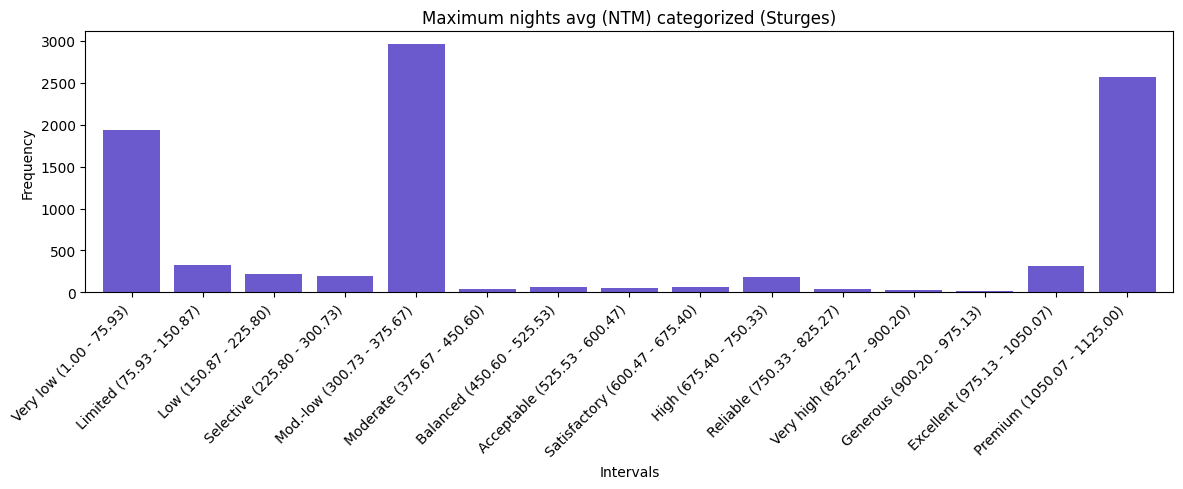

In [ ]:
# 1) Clean & numeric
df['maximum_nights_avg_ntm_num'] = pd.to_numeric(df['maximum_nights_avg_ntm'], errors='coerce')

# 2) Basic parameters
n = df['maximum_nights_avg_ntm_num'].dropna().shape[0]
Min_mn = df['maximum_nights_avg_ntm_num'].min()
Max_mn = df['maximum_nights_avg_ntm_num'].max()
R_mn   = Max_mn - Min_mn
ni_mn_real = 1 + 3.32 * np.log10(n) if n > 0 else 1
ni_mn = 15  # mantenemos 15 clases como estilo

print("Total n:", n)
print("Min:", Min_mn)
print("Max:", Max_mn)
print("Range:", R_mn)
print("Sturges (approx.):", ni_mn_real, "| Used:", ni_mn)

# 3) Bin edges (ligero acolchado para incluir extremos)
low_edge  = Min_mn - 1e-6
high_edge = Max_mn + 1e-6
intervalos_mn = np.linspace(low_edge, high_edge, ni_mn + 1)

# 4) English-only labels
names_en = [
    "Very low","Limited","Low","Selective","Mod.-low",
    "Moderate","Balanced","Acceptable","Satisfactory","High",
    "Reliable","Very high","Generous","Excellent","Premium"
]

categorias_mn = []
for j in range(ni_mn):
    a, b = intervalos_mn[j], intervalos_mn[j+1]
    categorias_mn.append(f"{names_en[j]} ({a:.2f} - {b:.2f})")

# 5) Categorize
df['maximum_nights_avg_ntm_cat'] = pd.cut(
    x=df['maximum_nights_avg_ntm_num'],
    bins=intervalos_mn,
    labels=categorias_mn,
    include_lowest=True,
    right=False
)

# 6) Frequency table
tabla_mn_cat = df['maximum_nights_avg_ntm_cat'].value_counts().sort_index()
print(tabla_mn_cat)

# 7) Plot
tabla_mn_cat.plot(kind='bar', figsize=(12,5), color="slateblue", width=0.8)
plt.title('Maximum nights avg (NTM) categorized (Sturges)')
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Total n: 9009
Min: 0
Max: 365
Range: 365
Sturges (approx.): 14.129526268569895 | Used: 15
availability_365_cat
Very low (-0 - 24 days)          916
Limited (24 - 48 days)           664
Low (48 - 73 days)               639
Selective (73 - 97 days)         726
Mod.-low (97 - 122 days)         541
Moderate (122 - 146 days)        558
Balanced (146 - 170 days)        500
Acceptable (170 - 195 days)      482
Satisfactory (195 - 219 days)    431
High (219 - 244 days)            470
Reliable (244 - 268 days)        510
Very high (268 - 292 days)       575
Generous (292 - 317 days)        541
Excellent (317 - 341 days)       626
Premium (341 - 366 days)         830
Name: count, dtype: int64


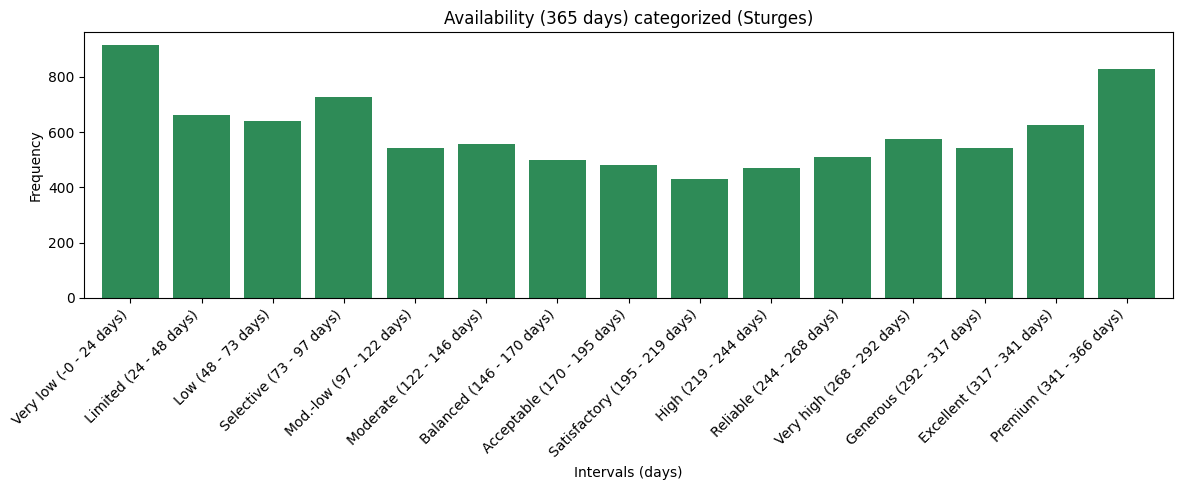

In [ ]:
# 1) Clean & numeric
df['availability_365_num'] = pd.to_numeric(df['availability_365'], errors='coerce')

# 2) Basic parameters
n = df['availability_365_num'].dropna().shape[0]
Min_av = df['availability_365_num'].min()
Max_av = df['availability_365_num'].max()
R_av   = Max_av - Min_av
ni_av_real = 1 + 3.32 * np.log10(n) if n > 0 else 1
ni_av = 15  # mantenemos 15 clases para consistencia

print("Total n:", n)
print("Min:", Min_av)
print("Max:", Max_av)
print("Range:", R_av)
print("Sturges (approx.):", ni_av_real, "| Used:", ni_av)

# 3) Bin edges (ligero acolchado para incluir extremos)
low_edge  = Min_av - 0.5
high_edge = Max_av + 0.5
intervalos_av = np.linspace(low_edge, high_edge, ni_av + 1)

# 4) English-only labels
names_en = [
    "Very low","Limited","Low","Selective","Mod.-low",
    "Moderate","Balanced","Acceptable","Satisfactory","High",
    "Reliable","Very high","Generous","Excellent","Premium"
]

categorias_av = []
for j in range(ni_av):
    a, b = intervalos_av[j], intervalos_av[j+1]
    categorias_av.append(f"{names_en[j]} ({a:.0f} - {b:.0f} days)")

# 5) Categorize
df['availability_365_cat'] = pd.cut(
    x=df['availability_365_num'],
    bins=intervalos_av,
    labels=categorias_av,
    include_lowest=True,
    right=False
)

# 6) Frequency table
tabla_av_cat = df['availability_365_cat'].value_counts().sort_index()
print(tabla_av_cat)

# 7) Plot
tabla_av_cat.plot(kind='bar', figsize=(12,5), color="seagreen", width=0.8)
plt.title('Availability (365 days) categorized (Sturges)')
plt.xlabel('Intervals (days)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Total n: 9009
Min: 0.0
Max: 129.0
Range: 129.0
Sturges (approx.): 14.129526268569895 | Used: 15
number_of_reviews_cat
Very low (-0 - 8 reviews)         3864
Limited (8 - 17 reviews)           906
Low (17 - 26 reviews)             1737
Selective (26 - 34 reviews)        517
Mod.-low (34 - 43 reviews)         377
Moderate (43 - 52 reviews)         313
Balanced (52 - 60 reviews)         260
Acceptable (60 - 69 reviews)       167
Satisfactory (69 - 78 reviews)     174
High (78 - 86 reviews)             175
Reliable (86 - 95 reviews)         121
Very high (95 - 104 reviews)       135
Generous (104 - 112 reviews)        95
Excellent (112 - 121 reviews)       84
Premium (121 - 130 reviews)         84
Name: count, dtype: int64


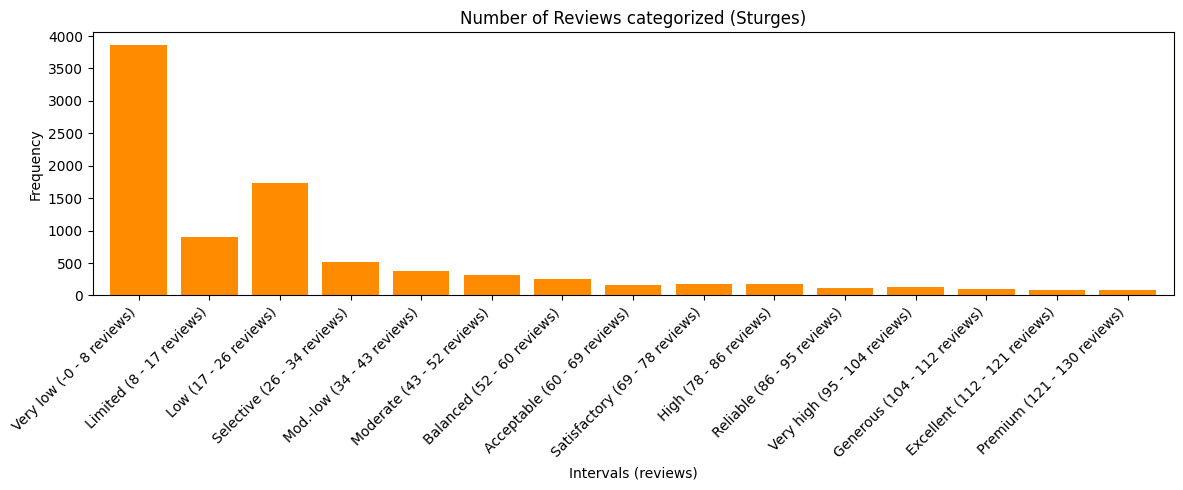

In [ ]:
# 1) Clean & numeric
df['number_of_reviews_num'] = pd.to_numeric(df['number_of_reviews'], errors='coerce')

# 2) Basic parameters
n = df['number_of_reviews_num'].dropna().shape[0]
Min_nrev = df['number_of_reviews_num'].min()
Max_nrev = df['number_of_reviews_num'].max()
R_nrev   = Max_nrev - Min_nrev
ni_nrev_real = 1 + 3.32 * np.log10(n) if n > 0 else 1
ni_nrev = 15  # mantener 15 clases para consistencia

print("Total n:", n)
print("Min:", Min_nrev)
print("Max:", Max_nrev)
print("Range:", R_nrev)
print("Sturges (approx.):", ni_nrev_real, "| Used:", ni_nrev)

# 3) Bin edges (padding .5 para alinear enteros)
low_edge  = Min_nrev - 0.5
high_edge = Max_nrev + 0.5
intervalos_nrev = np.linspace(low_edge, high_edge, ni_nrev + 1)

# 4) English-only labels
names_en = [
    "Very low","Limited","Low","Selective","Mod.-low",
    "Moderate","Balanced","Acceptable","Satisfactory","High",
    "Reliable","Very high","Generous","Excellent","Premium"
]

categorias_nrev = []
for j in range(ni_nrev):
    a, b = intervalos_nrev[j], intervalos_nrev[j+1]
    categorias_nrev.append(f"{names_en[j]} ({a:.0f} - {b:.0f} reviews)")

# 5) Categorize
df['number_of_reviews_cat'] = pd.cut(
    x=df['number_of_reviews_num'],
    bins=intervalos_nrev,
    labels=categorias_nrev,
    include_lowest=True,
    right=False
)

# 6) Frequency table
tabla_nrev_cat = df['number_of_reviews_cat'].value_counts().sort_index()
print(tabla_nrev_cat)

# 7) Plot
tabla_nrev_cat.plot(kind='bar', figsize=(12,5), color="darkorange", width=0.8)
plt.title('Number of Reviews categorized (Sturges)')
plt.xlabel('Intervals (reviews)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Total n: 9009
Min: 3.13
Max: 5.0
Range: 1.87
Sturges (approx.): 14.129526268569895 | Used: 15
review_scores_value_cat
Very low (3.13 - 3.25)          13
Limited (3.25 - 3.38)           21
Low (3.38 - 3.50)               56
Selective (3.50 - 3.63)         13
Mod.-low (3.63 - 3.75)          59
Moderate (3.75 - 3.88)          37
Balanced (3.88 - 4.00)         332
Acceptable (4.00 - 4.13)        84
Satisfactory (4.13 - 4.25)     294
High (4.25 - 4.38)             391
Reliable (4.38 - 4.50)         850
Very high (4.50 - 4.63)       2508
Generous (4.63 - 4.75)        1644
Excellent (4.75 - 4.88)       1245
Premium (4.88 - 5.00)         1462
Name: count, dtype: int64


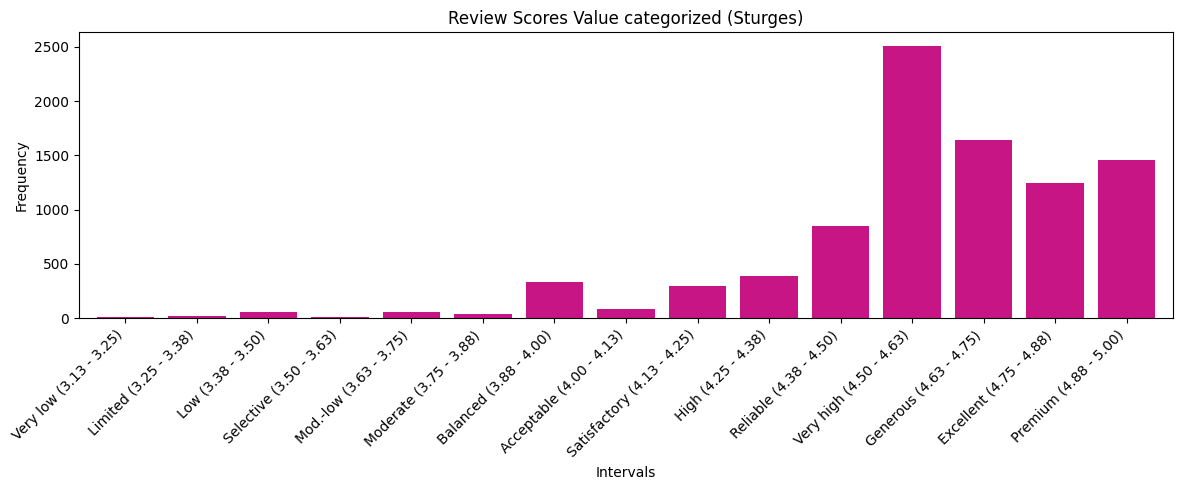

In [ ]:
# 1) Clean & numeric
df['review_scores_value_num'] = pd.to_numeric(df['review_scores_value'], errors='coerce')

# 2) Basic parameters
n = df['review_scores_value_num'].dropna().shape[0]
Min_val = df['review_scores_value_num'].min()
Max_val = df['review_scores_value_num'].max()
R_val   = Max_val - Min_val
ni_val_real = 1 + 3.32 * np.log10(n) if n > 0 else 1
ni_val = 15  # mantener 15 clases como en el resto

print("Total n:", n)
print("Min:", Min_val)
print("Max:", Max_val)
print("Range:", R_val)
print("Sturges (approx.):", ni_val_real, "| Used:", ni_val)

# 3) Bin edges (ligero acolchado)
low_edge  = Min_val - 1e-6
high_edge = Max_val + 1e-6
intervalos_val = np.linspace(low_edge, high_edge, ni_val + 1)

# 4) English-only labels
names_en = [
    "Very low","Limited","Low","Selective","Mod.-low",
    "Moderate","Balanced","Acceptable","Satisfactory","High",
    "Reliable","Very high","Generous","Excellent","Premium"
]

categorias_val = []
for j in range(ni_val):
    a, b = intervalos_val[j], intervalos_val[j+1]
    categorias_val.append(f"{names_en[j]} ({a:.2f} - {b:.2f})")

# 5) Categorize
df['review_scores_value_cat'] = pd.cut(
    x=df['review_scores_value_num'],
    bins=intervalos_val,
    labels=categorias_val,
    include_lowest=True,
    right=False
)

# 6) Frequency table
tabla_val_cat = df['review_scores_value_cat'].value_counts().sort_index()
print(tabla_val_cat)

# 7) Plot
tabla_val_cat.plot(kind='bar', figsize=(12,5), color="mediumvioletred", width=0.8)
plt.title('Review Scores Value categorized (Sturges)')
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Total n: 9009
Min: 0.0
Max: 5.18
Range: 5.18
Sturges (approx.): 14.129526268569895 | Used: 15
reviews_per_month_cat
Very low (-0.00 - 0.35)       2975
Limited (0.35 - 0.69)         1160
Low (0.69 - 1.04)              849
Selective (1.04 - 1.38)        869
Mod.-low (1.38 - 1.73)         478
Moderate (1.73 - 2.07)         546
Balanced (2.07 - 2.42)         447
Acceptable (2.42 - 2.76)       385
Satisfactory (2.76 - 3.11)     322
High (3.11 - 3.45)             248
Reliable (3.45 - 3.80)         238
Very high (3.80 - 4.14)        169
Generous (4.14 - 4.49)         142
Excellent (4.49 - 4.83)         89
Premium (4.83 - 5.18)           92
Name: count, dtype: int64


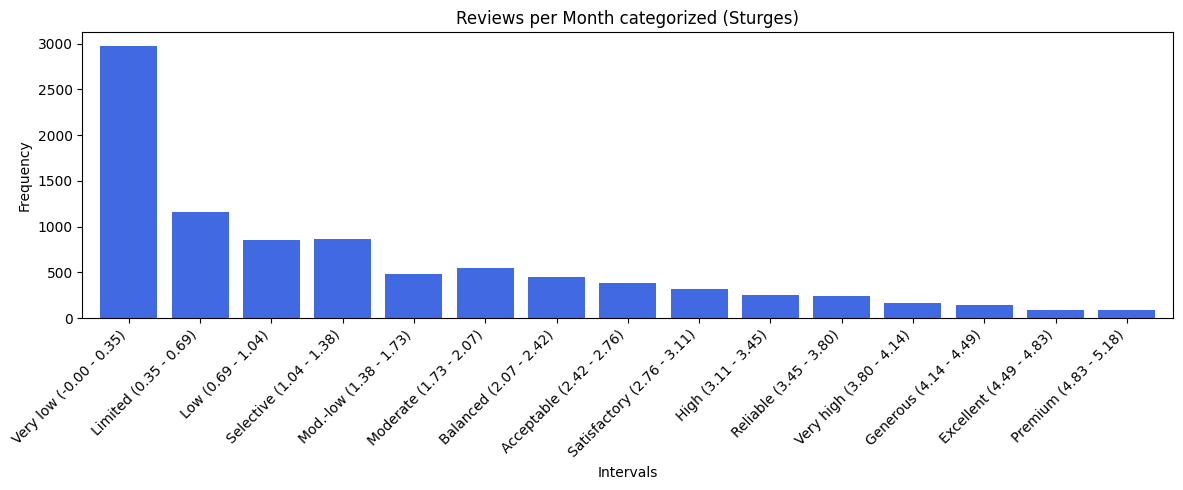

In [ ]:
# 1) Clean & numeric
df['reviews_per_month_num'] = pd.to_numeric(df['reviews_per_month'], errors='coerce')

# 2) Basic parameters
n = df['reviews_per_month_num'].dropna().shape[0]
Min_rpm = df['reviews_per_month_num'].min()
Max_rpm = df['reviews_per_month_num'].max()
R_rpm   = Max_rpm - Min_rpm
ni_rpm_real = 1 + 3.32 * np.log10(n) if n > 0 else 1
ni_rpm = 15  # keep 15 classes for consistency

print("Total n:", n)
print("Min:", Min_rpm)
print("Max:", Max_rpm)
print("Range:", R_rpm)
print("Sturges (approx.):", ni_rpm_real, "| Used:", ni_rpm)

# 3) Bin edges (slight padding for continuous data)
low_edge  = Min_rpm - 1e-6
high_edge = Max_rpm + 1e-6
intervalos_rpm = np.linspace(low_edge, high_edge, ni_rpm + 1)

# 4) English-only labels
names_en = [
    "Very low","Limited","Low","Selective","Mod.-low",
    "Moderate","Balanced","Acceptable","Satisfactory","High",
    "Reliable","Very high","Generous","Excellent","Premium"
]

categorias_rpm = []
for j in range(ni_rpm):
    a, b = intervalos_rpm[j], intervalos_rpm[j+1]
    categorias_rpm.append(f"{names_en[j]} ({a:.2f} - {b:.2f})")

# 5) Categorize
df['reviews_per_month_cat'] = pd.cut(
    x=df['reviews_per_month_num'],
    bins=intervalos_rpm,
    labels=categorias_rpm,
    include_lowest=True,
    right=False
)

# 6) Frequency table
tabla_rpm_cat = df['reviews_per_month_cat'].value_counts().sort_index()
print(tabla_rpm_cat)

# 7) Plot
tabla_rpm_cat.plot(kind='bar', figsize=(12,5), color="royalblue", width=0.8)
plt.title('Reviews per Month categorized (Sturges)')
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


El categorizar variables numéricas mediante reglas como la de Sturges permite dividir los datos en intervalos o clases que hacen más fácil interpretar su distribución.

Ayuda a resumir información continua o con muchos valores distintos.

Facilita la visualización de patrones (ejemplo: cuántos alojamientos tienen entre 1 y 3 camas, o cuántos precios están en cierto rango).

Permite comparar grupos y encontrar concentraciones, extremos o anomalías.

Es útil en análisis exploratorio y como paso previo a técnicas estadísticas o de machine learning.

En pocas palabras, categorizar transforma un mar de números en bloques más comprensibles, mostrando la frecuencia de cada rango.

Conversión a numérico:
Primero se limpia cada variable (price, beds, reviews_per_month, etc.), eliminando símbolos como % o $, y convirtiéndolos a valores numéricos con pd.to_numeric o funciones de limpieza.

Cálculo de parámetros básicos:

n: número de observaciones.

Min y Max: valores mínimo y máximo.

R: rango (Max − Min).

ni: número de intervalos, calculado con la regla de Sturges:

𝑛
𝑖
=
1
+
3.32
⋅
log
⁡
10
(
𝑛
)
ni=1+3.32⋅log
10
	​

(n)

En nuestro caso, lo forzamos a 15 clases para mantener consistencia.

Definición de intervalos:
Se crean con np.linspace, que divide el rango total en 15 tramos iguales.

Etiquetas:
A cada intervalo se le asigna un nombre en inglés (ej. Very low, Moderate, High), junto con el rango numérico exacto ((a – b)).

Categorización (pd.cut):
Se asigna a cada observación en qué intervalo cae, creando una nueva columna como price_cat o beds_cat.

Frecuencias:
Se calcula la frecuencia de cada categoría con value_counts().sort_index().

Visualización:
Finalmente se genera un gráfico de barras para mostrar visualmente en qué rangos se concentra la mayoría de los datos.